In [1]:
import setup

In [9]:
import qiskit
import matplotlib
import matplotlib.pyplot as plt
from circuit import QCircuit
from algo.func_optimizer import BfgsOptimizer, CmaesOptimizer
from algo.one_plus_lambda import OnePlusLambda, EvolutionReport, IterationReport
from iohelper import hamiltonians, results as rio
from circuit import QCircuit, GateTypes, QCircuitConversions
from algo.vqe import PyVqe
from mutations import Weighted, Insert, Remove, add_two_block_layers
from algo.cvqe_wrapper import CVqe

In [15]:
def run(task, block_type, max_cmaes_iter=None, verbose=True):
    # Show information about task
    if verbose:
        print('Minimal eigenvalue is  {}'.format(task.min_eigenvalue))
        print('Initial state is {}'.format(task.classical_psi0_bitstring))

    # Initialize circuit 
    circuit = QCircuit(task.N, task.classical_psi0, [])
    add_two_block_layers(circuit, block_type)


    def on_iteration_end(report: IterationReport):
        if verbose:
            num_evaluations = sum(m.num_circ_evaluations for m in report.mutations)
            print('Iteration #{} is finished, {} circuit evaluations performed'.format(report.index, num_evaluations))
            print('  Values: {}!'.format(', '.join(str(m.value) for m in report.mutations)))
            if report.better:
                best_mutation = report.mutations[0]
                print('  New value: {}!'.format(best_mutation.value))
                circ = best_mutation.circ
                display(QCircuitConversions.to_qiskit_circuit(circ).draw(output='mpl'))


    # Run evolutional algorithm
    ev = OnePlusLambda(
        target=task.min_eigenvalue,
        vqe=CVqe(task.H, 1e-5),
#         vqe=PyVqe(hamiltonian=task.H, optimizer=BfgsOptimizer()),
        mutation=Weighted([
            (Insert(block_type), 2),
            (Remove(), 1)
        ]),
        initial=circuit,
        target_eps=0.0016,
        alambda=12
    )
    report: EvolutionReport = ev.run(iteration_end_callback=on_iteration_end)

    # Show results
    if report.interrupted:
        print('INTERRUPTED')

    print('Number of CNOTs: ' + str(report.best_circuit.size))
    print('Best value is: ' + str(report.best_circuit_value))
    print('Number of iterations is: ' + str(len(report.iterations) - 1))
    if verbose:
        display(QCircuitConversions.to_qiskit_circuit(report.best_circuit).draw(output='mpl'))
    return report



Minimal eigenvalue is  -15.570170984304301
Initial state is 11000000
Initial value: -15.5600961033146
Iteration #1 is finished, 61282 circuit evaluations performed
  Values: -15.560097916205232, -15.560097873711443, -15.56009762863891, -15.560097451857837, -15.560097005892864, -15.560096682427922, -15.560096147804657, -15.5600960673176, -15.56009588434074, -15.560095818834213, -15.560093298983254, -15.56009261379052!
  New value: -15.560097916205232!


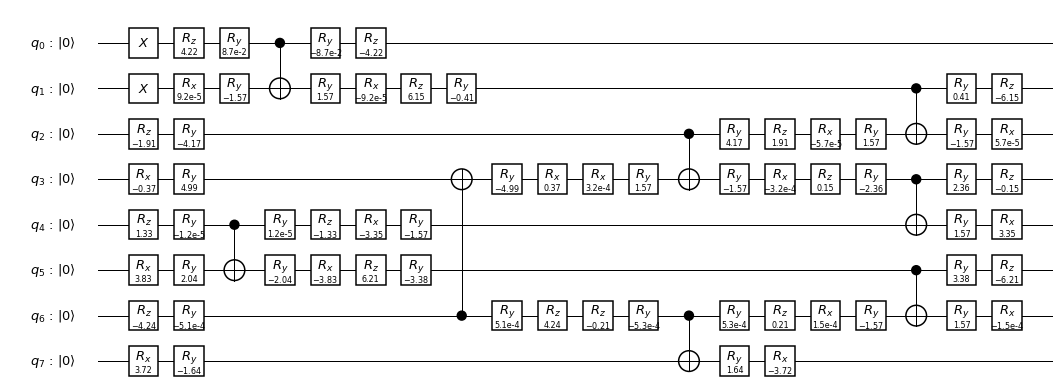

Iteration #2 is finished, 67244 circuit evaluations performed
  Values: -15.56009816919499, -15.560098075917207, -15.56009780820188, -15.560097746295343, -15.560097515807284, -15.560097396029, -15.560096958005012, -15.56009674055107, -15.56009674055107, -15.560096525167872, -15.560096444633876, -15.560095822646595!
  New value: -15.56009816919499!


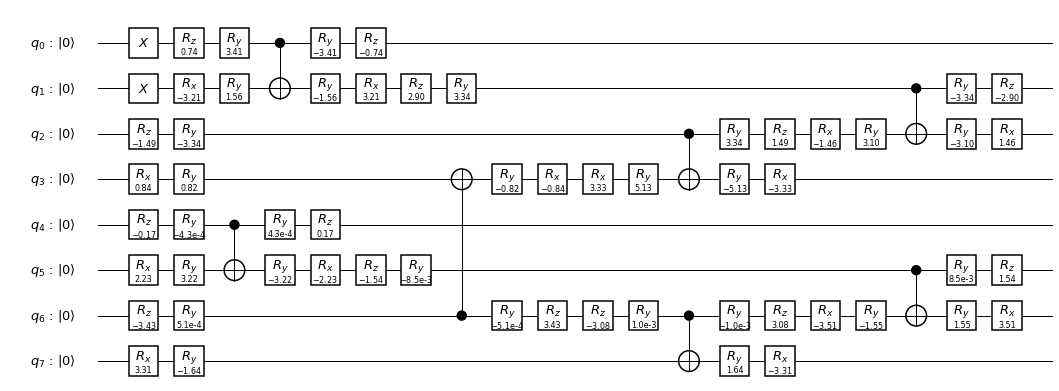

Iteration #3 is finished, 69609 circuit evaluations performed
  Values: -15.56305194625138, -15.56009815949425, -15.56009778902241, -15.560097709068271, -15.56009755852151, -15.560097090730695, -15.560096905969848, -15.560096631861557, -15.560096082331611, -15.56009405401263, -15.560093831362405, -15.560093269093704!
  New value: -15.56305194625138!


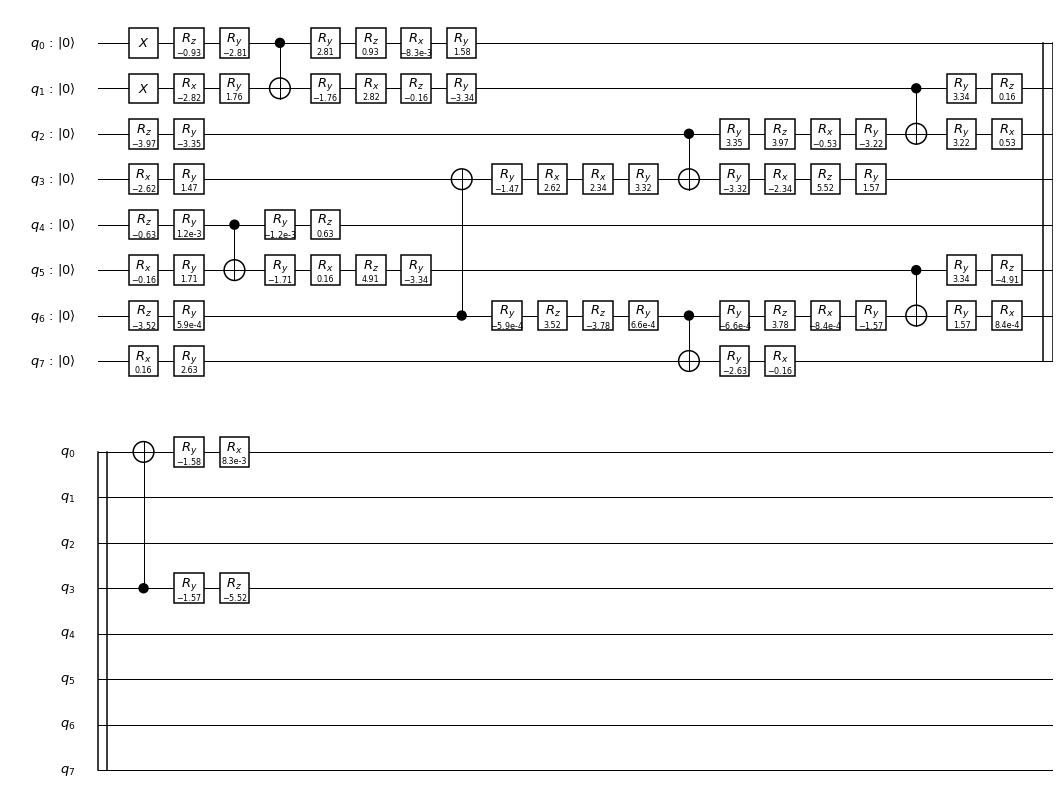

Iteration #4 is finished, 74096 circuit evaluations performed
  Values: -15.56306071373254, -15.560101333973543, -15.560097954814504, -15.560097699088404, -15.560097665173764, -15.560097648126606, -15.560097554337545, -15.560097201458811, -15.560096180253696, -15.560096103239003, -15.560095293186151, -15.560094445644253!
  New value: -15.56306071373254!


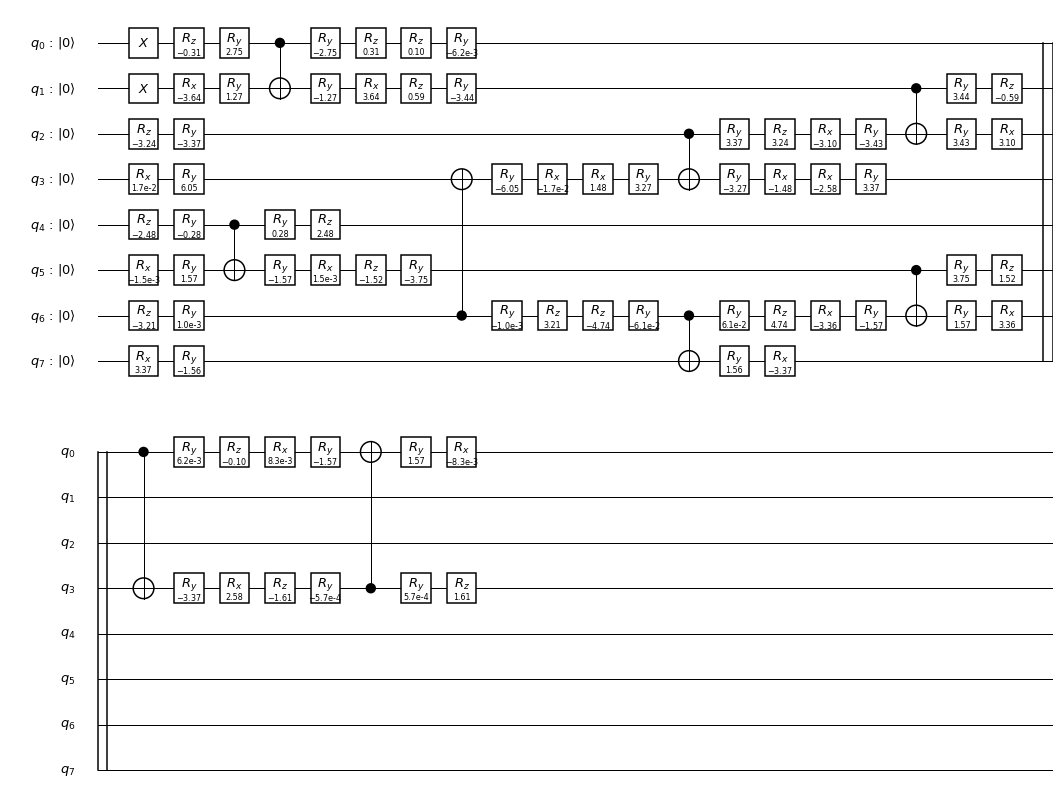

Iteration #5 is finished, 92490 circuit evaluations performed
  Values: -15.563063787867648, -15.563052309050367, -15.563045500104469, -15.562712082006474, -15.560100183157168, -15.560096964435681, -15.560096857434234, -15.560096803461501, -15.560096647948086, -15.560096382303067, -15.560094766051385, -15.56008923059875!
  New value: -15.563063787867648!


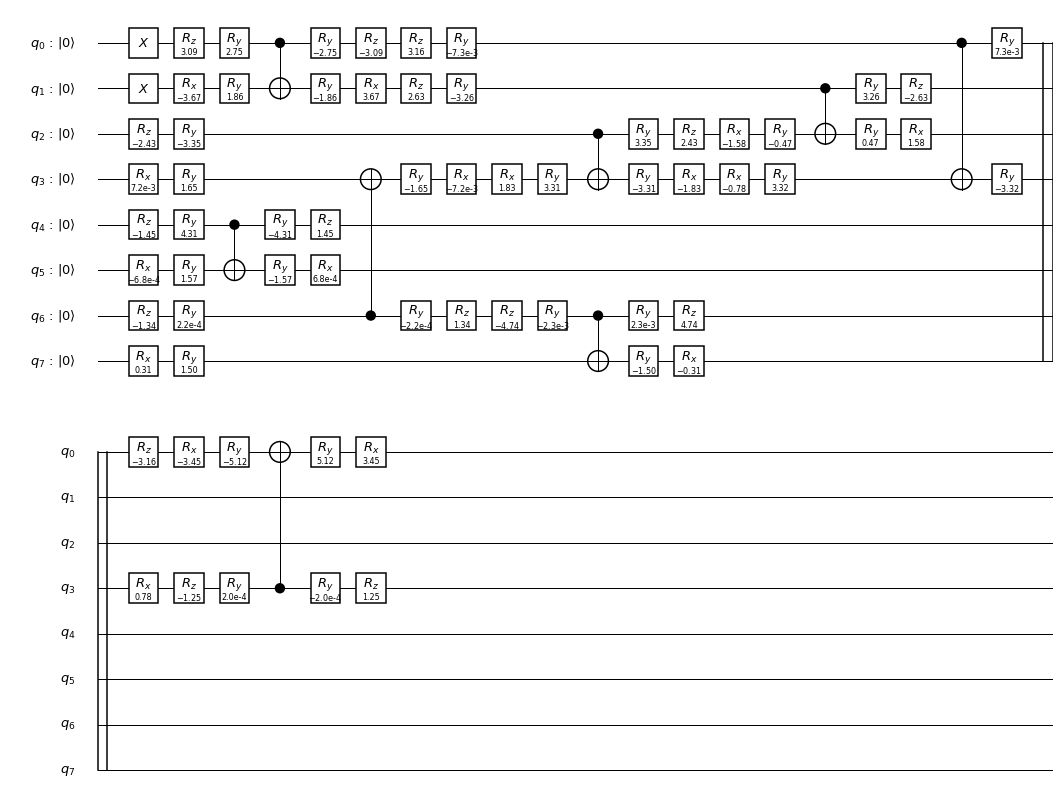

Iteration #6 is finished, 82651 circuit evaluations performed
  Values: -15.563059288416127, -15.56305805888791, -15.563054148816246, -15.563045018694895, -15.562712158605867, -15.562710282805106, -15.56261037910756, -15.56009785145692, -15.560097348473708, -15.560097029688102, -15.560096461074016, -15.560094003211777!
Iteration #7 is finished, 107212 circuit evaluations performed
  Values: -15.563086741729487, -15.563076764284665, -15.56305244588427, -15.562558785070786, -15.560925529500498, -15.560105039163881, -15.560097874330276, -15.560097411721843, -15.560097276790119, -15.560097086860019, -15.560096406861838, -15.560084748290702!
  New value: -15.563086741729487!


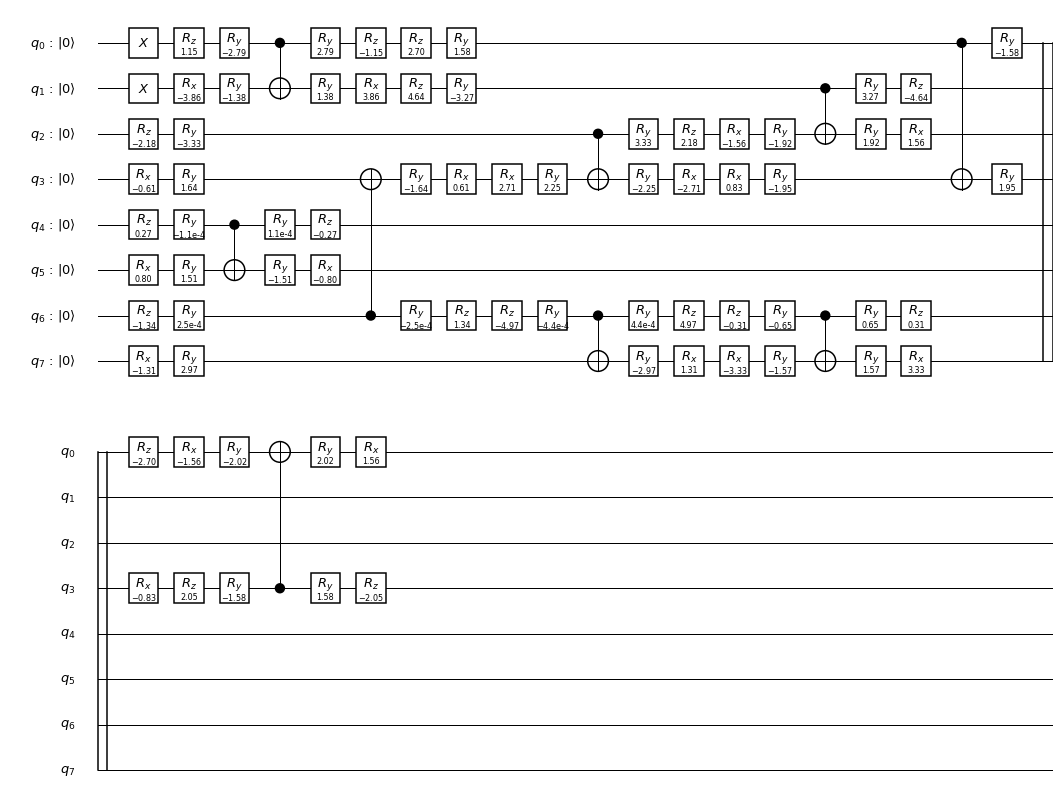

Iteration #8 is finished, 98198 circuit evaluations performed
  Values: -15.564780403470202, -15.563063928748246, -15.563060944905107, -15.56270376973086, -15.560097844552068, -15.560097730663792, -15.560097685842825, -15.560096932125825, -15.560096559137346, -15.560096243130067, -15.5600961866523, -15.560094989741001!
  New value: -15.564780403470202!


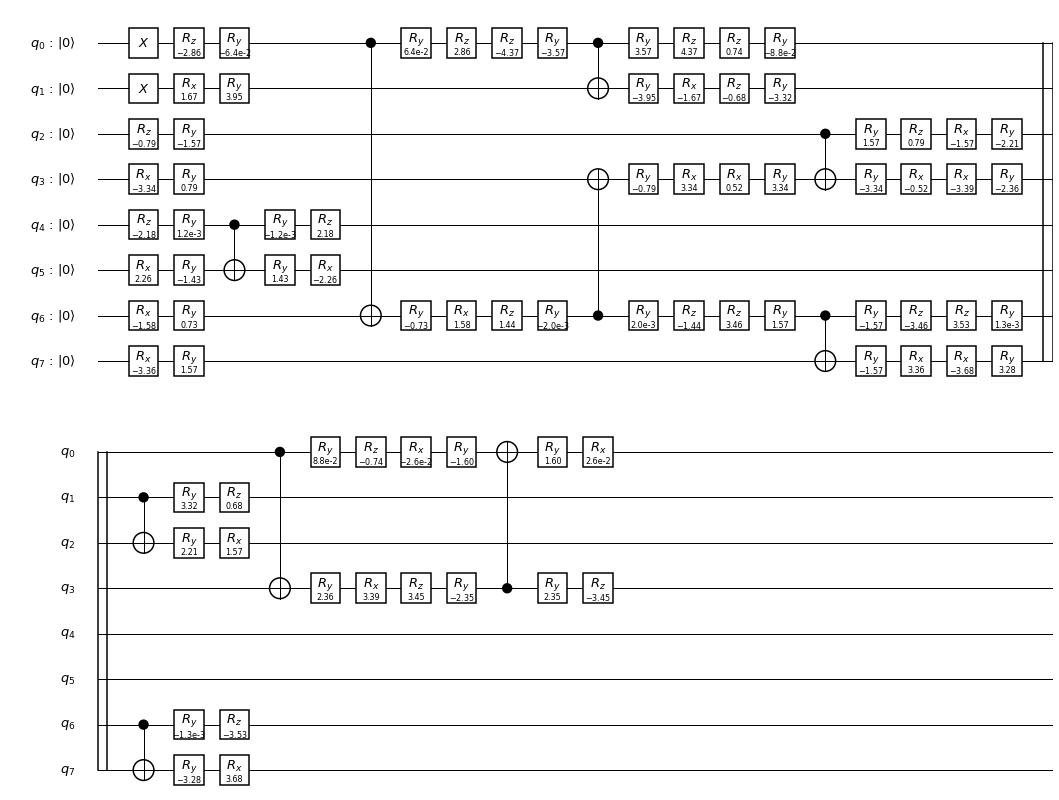

Iteration #9 is finished, 118236 circuit evaluations performed
  Values: -15.565052898085435, -15.56503396172463, -15.565029527400958, -15.563927271762584, -15.5600969276408, -15.560096846419844, -15.56009555405902, -15.560095268869922, -15.560095268869922, -15.5600943322113, -15.560093946198913, -15.560089876065689!
  New value: -15.565052898085435!


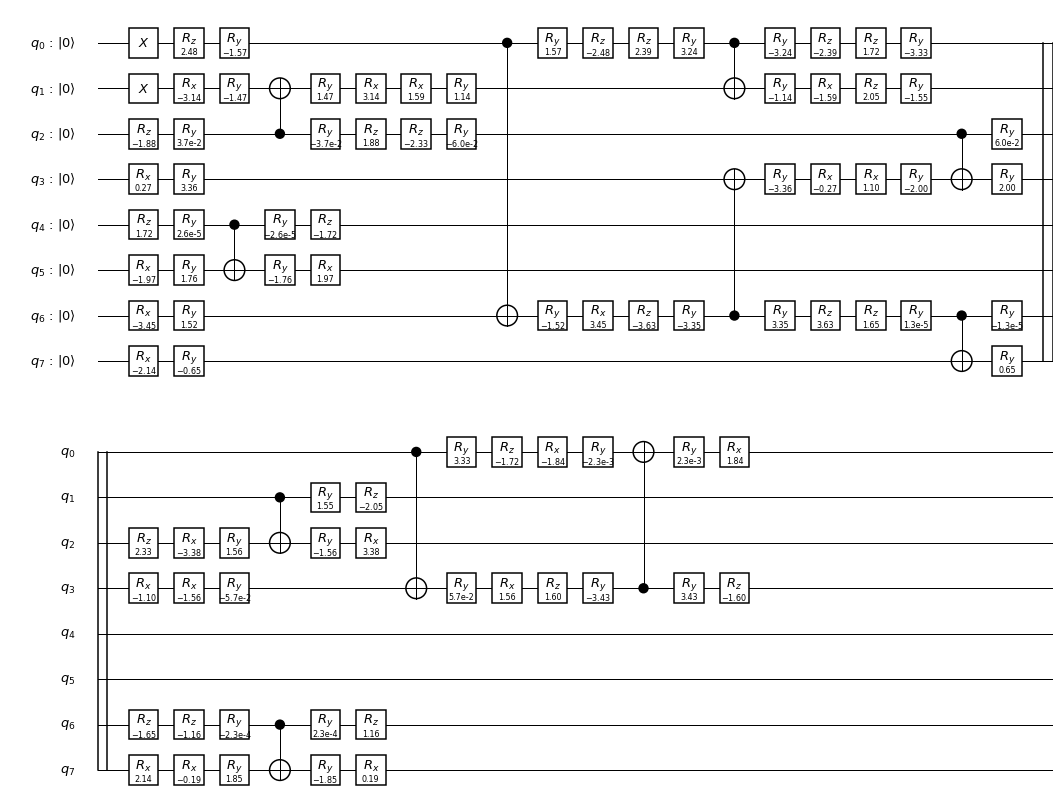

Iteration #10 is finished, 161790 circuit evaluations performed
  Values: -15.56754193860504, -15.565045716029884, -15.565023287819757, -15.564779626951898, -15.563096587412668, -15.563089338891615, -15.563087282198374, -15.563072523441926, -15.563045964896467, -15.560108597761309, -15.56010321852893, -15.560093618024887!
  New value: -15.56754193860504!


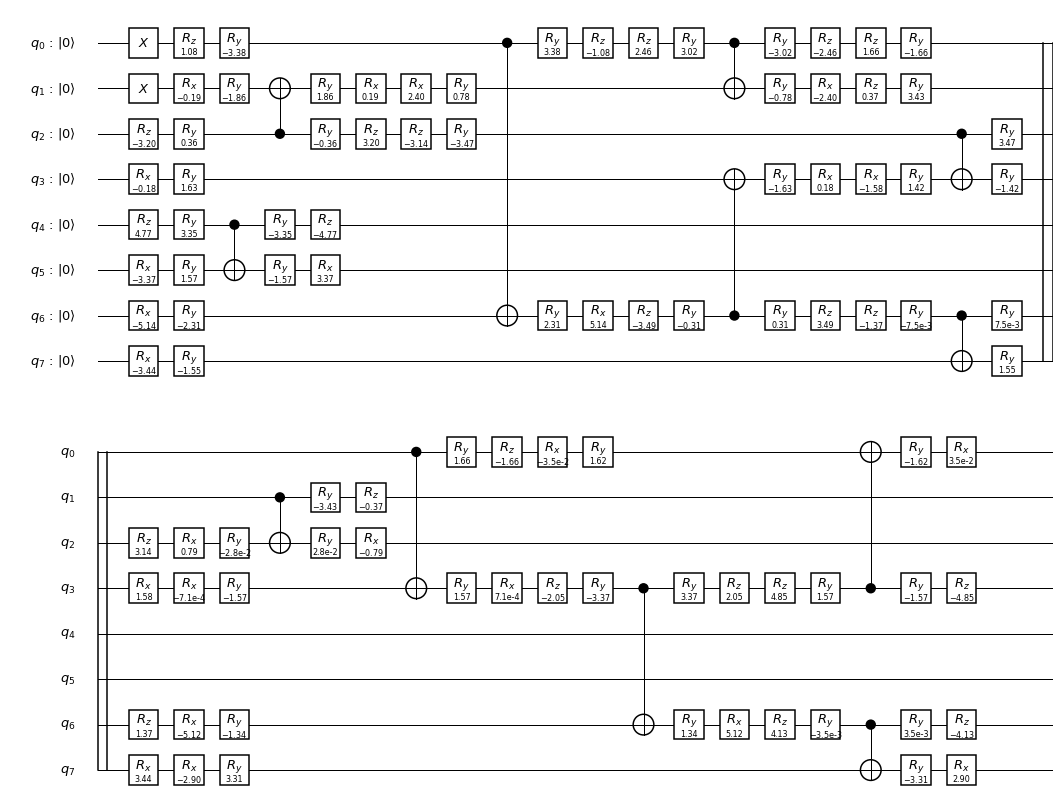

Iteration #11 is finished, 186000 circuit evaluations performed
  Values: -15.564998610829262, -15.563102751457164, -15.563101695619665, -15.563087820413694, -15.563045790274657, -15.563014909585286, -15.563003132647202, -15.560096819165933, -15.560096819165933, -15.560096698877448, -15.560096006243404, -15.560090569854342!
Iteration #12 is finished, 190395 circuit evaluations performed
  Values: -15.567573485746976, -15.564204201355185, -15.563102817509359, -15.563096498541503, -15.563084510753812, -15.563083518037708, -15.563054522408535, -15.56304783611819, -15.562591444732186, -15.560115194126258, -15.560099536563698, -15.56009472627965!
  New value: -15.567573485746976!


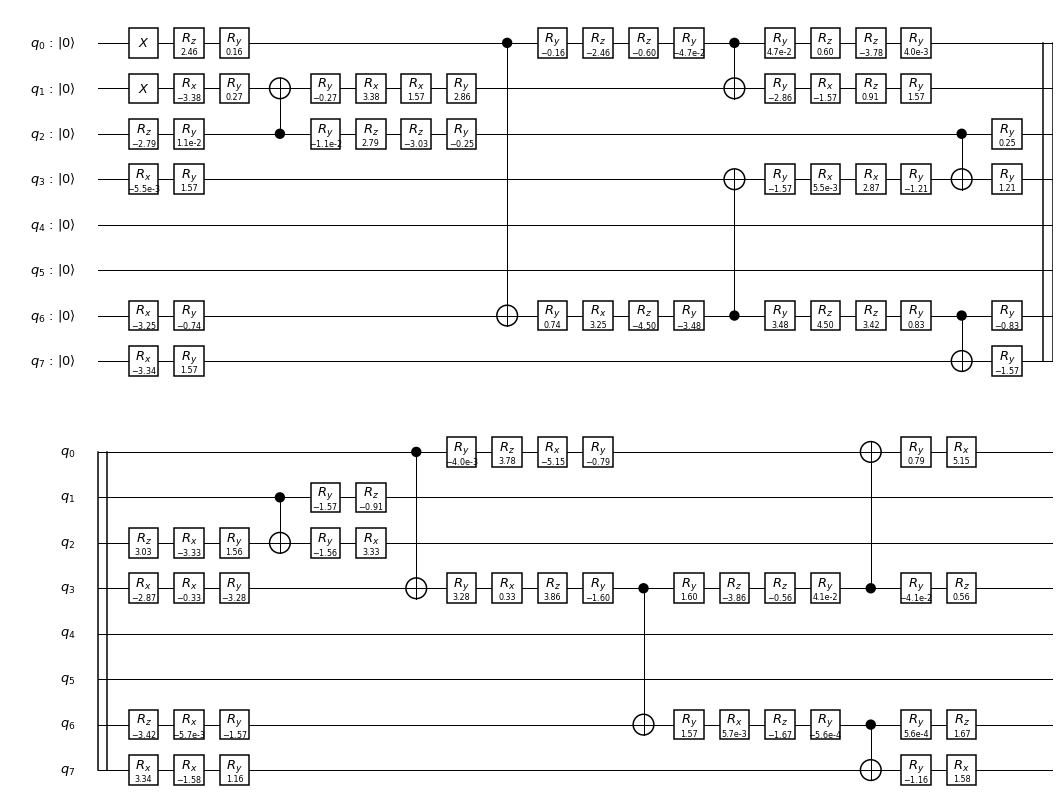

Iteration #13 is finished, 146670 circuit evaluations performed
  Values: -15.565025407406823, -15.56310155943527, -15.563100892332638, -15.563097198737328, -15.563061448926891, -15.563059001100866, -15.563034609284637, -15.563034609284637, -15.560097143302395, -15.560096054963056, -15.560095859082343, -15.560094197808409!
Iteration #14 is finished, 178365 circuit evaluations performed
  Values: -15.567637664386625, -15.567187137712144, -15.563104761443245, -15.563100768586018, -15.563100087428257, -15.56307393978584, -15.56307297499781, -15.563040932612214, -15.560096824812886, -15.560093588418024, -15.560093588418024, -15.560093520530836!
  New value: -15.567637664386625!


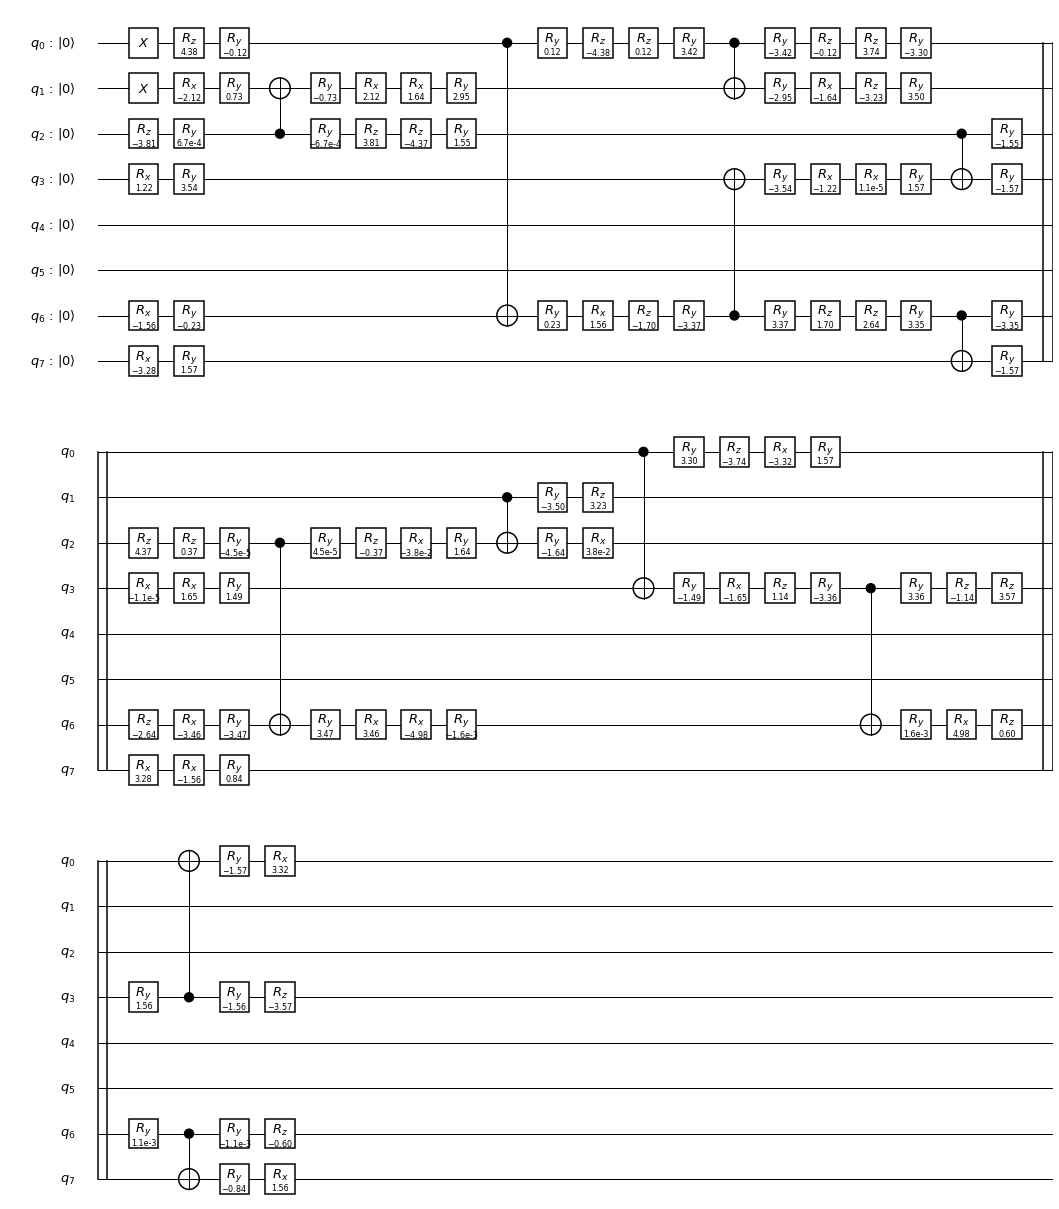

Iteration #15 is finished, 252675 circuit evaluations performed
  Values: -15.567573775123499, -15.566476246250842, -15.565038045889642, -15.564993779337355, -15.563974934674505, -15.563104335143482, -15.563103287519017, -15.563088375217756, -15.563086668740953, -15.563073213561239, -15.563061900933448, -15.56009282630042!
Iteration #16 is finished, 224595 circuit evaluations performed
  Values: -15.567637353206331, -15.56683481766529, -15.566522205191056, -15.566307819251023, -15.563094971444999, -15.563094078712792, -15.563091605523418, -15.56308516519369, -15.560112700966679, -15.560096153414415, -15.560095927257436, -15.560092374915316!
Iteration #17 is finished, 202365 circuit evaluations performed
  Values: -15.565288301943319, -15.565022954380082, -15.563100614481069, -15.563097233373675, -15.56309101074643, -15.560097186148989, -15.560097021022075, -15.560096367204665, -15.560096018043687, -15.56009478589434, -15.560094733408704, -15.560088471374554!
Iteration #18 is finished, 

Iteration #41 is finished, 192713 circuit evaluations performed
  Values: -15.56763547696563, -15.565033162072485, -15.564970939558231, -15.563108416781237, -15.563102600330563, -15.563100933830201, -15.563093231869454, -15.563090268508905, -15.563086427176575, -15.560100886119887, -15.560100886119887, -15.56009131264379!
Iteration #42 is finished, 230308 circuit evaluations performed
  Values: -15.56497588657856, -15.563101547008124, -15.563098866816803, -15.563094254460639, -15.563087762230044, -15.563076499679344, -15.563073982051097, -15.563067118258582, -15.56304578612891, -15.56300448619406, -15.560093378269093, -15.560092280211316!
Iteration #43 is finished, 177032 circuit evaluations performed
  Values: -15.566640510566186, -15.564363670918693, -15.563100393148153, -15.563093668998885, -15.56308410740713, -15.56307981558589, -15.563042952048823, -15.562964467398182, -15.562955330405192, -15.560097248942451, -15.560097170499823, -15.560095664908145!
Iteration #44 is finished, 27

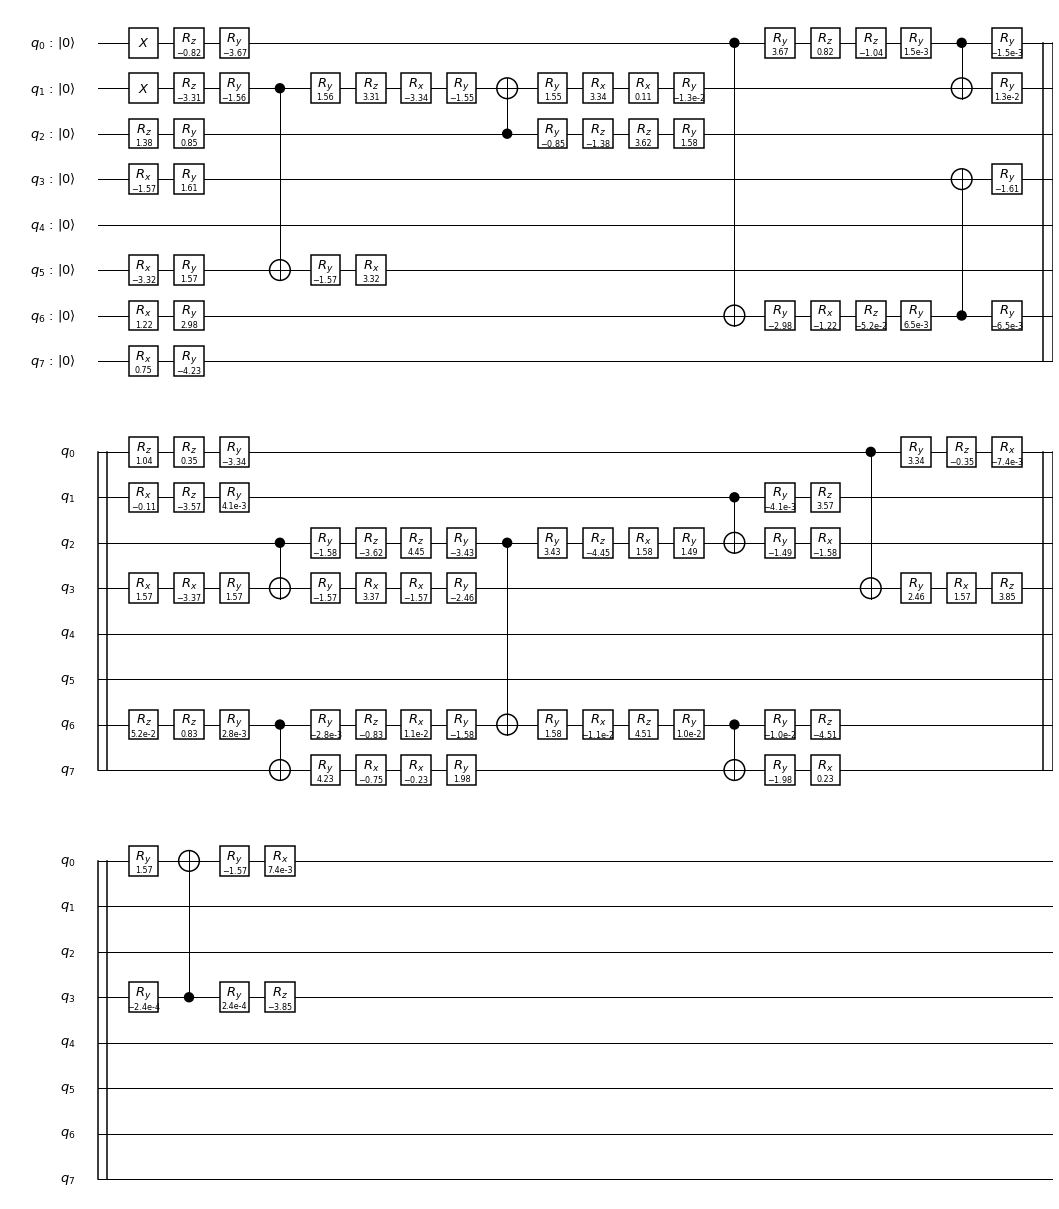

Iteration #52 is finished, 240285 circuit evaluations performed
  Values: -15.567599899499687, -15.56758833627421, -15.567549522482205, -15.56310410760438, -15.563101498509933, -15.563090065059672, -15.56009727753508, -15.56009727753508, -15.56009566623124, -15.56009223259233, -15.560090542980475, -15.560088949542605!
Iteration #53 is finished, 173325 circuit evaluations performed
  Values: -15.567607235594975, -15.5675992334858, -15.565036294415096, -15.563105020615872, -15.563098787384897, -15.563087885548578, -15.563037443636523, -15.560097730305744, -15.560097184000059, -15.560095342735663, -15.560095056787844, -15.560094865078327!
Iteration #54 is finished, 157350 circuit evaluations performed
  Values: -15.565030260637661, -15.56502679932818, -15.563102382145948, -15.563102382145948, -15.563101672874105, -15.563098902681778, -15.563052940480015, -15.560096040248485, -15.560096025834222, -15.56009551636992, -15.560093841173735, -15.56009137438647!
Iteration #55 is finished, 231600

Iteration #78 is finished, 201970 circuit evaluations performed
  Values: -15.567632909652488, -15.565034877088443, -15.564918757681166, -15.564892440005703, -15.563090049220456, -15.563077126569855, -15.563032258687155, -15.56298688430979, -15.56009710360106, -15.560094676676844, -15.560094665836337, -15.560094375879485!
Iteration #79 is finished, 171402 circuit evaluations performed
  Values: -15.567574396879895, -15.567244320152682, -15.565006675048581, -15.563105341706315, -15.563097984518928, -15.563090887790185, -15.563060647764535, -15.560101263210225, -15.5600955223243, -15.560094549719297, -15.56009439514875, -15.560087521984537!
Iteration #80 is finished, 200645 circuit evaluations performed
  Values: -15.567641385331015, -15.56760312996156, -15.563103466510869, -15.563101486653848, -15.563089137032692, -15.563082907538258, -15.562613358195293, -15.560096328913449, -15.560095587797486, -15.560094652244896, -15.560092580107165, -15.560092063644941!
Iteration #81 is finished, 1

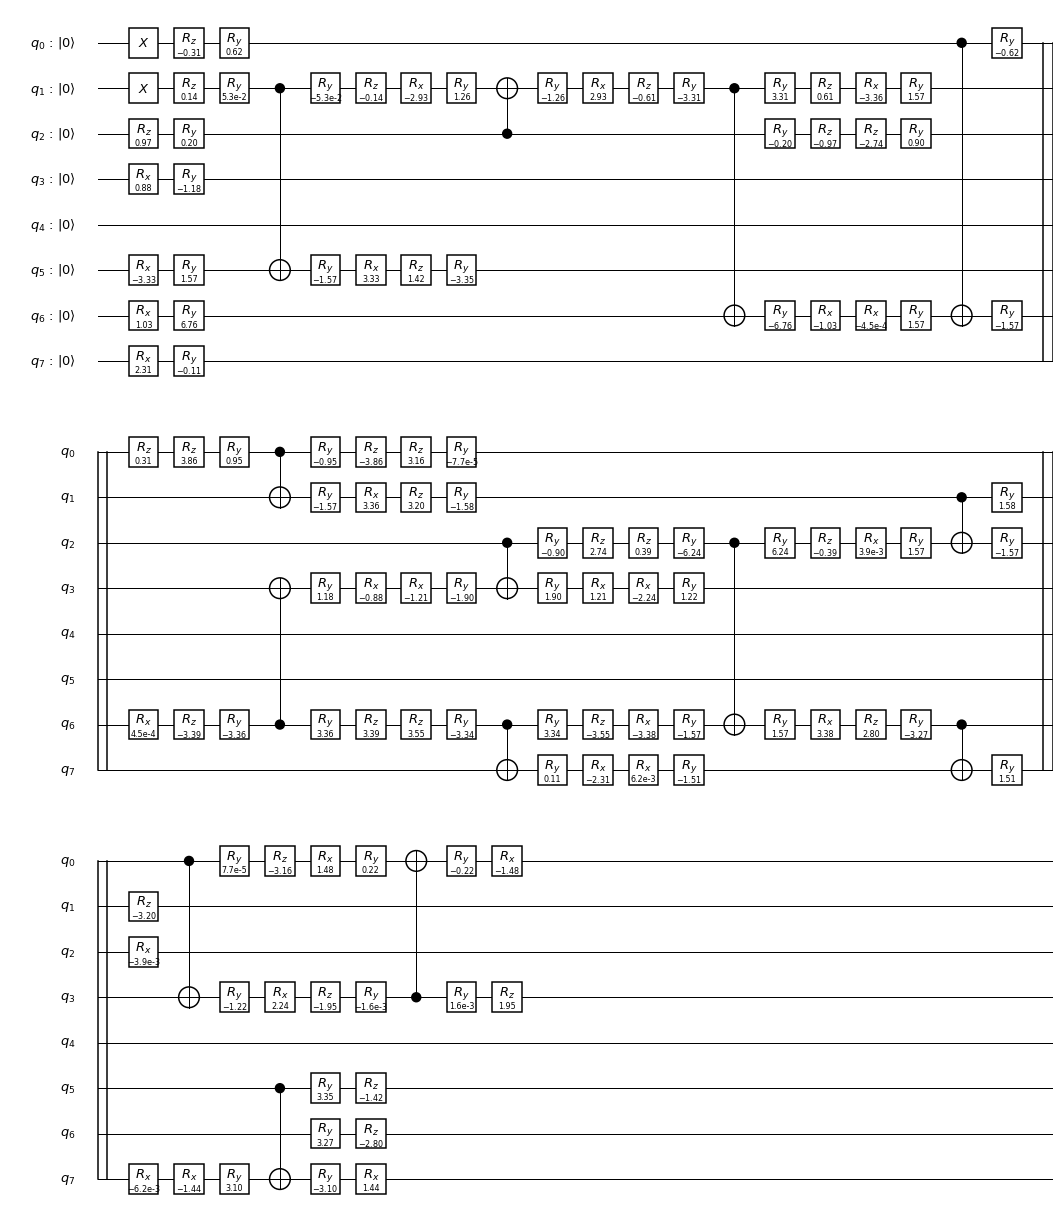

Iteration #83 is finished, 279490 circuit evaluations performed
  Values: -15.567630388207252, -15.566617794396782, -15.56657175954508, -15.564917657907342, -15.563093543185595, -15.563085673614767, -15.563057789699398, -15.563057334441076, -15.560100876422496, -15.560096732361265, -15.560093334698683, -15.560093323349905!
Iteration #84 is finished, 320659 circuit evaluations performed
  Values: -15.56756794001814, -15.567520049080205, -15.567192166727969, -15.565034176540228, -15.565025356444554, -15.56309910278736, -15.563098682895866, -15.563084898185648, -15.563041161773016, -15.560094578510196, -15.560094446687817, -15.560091882295593!
Iteration #85 is finished, 244864 circuit evaluations performed
  Values: -15.566816281709524, -15.5650375740663, -15.565031309972856, -15.56312550356857, -15.563091401899179, -15.56308407743092, -15.563039600538673, -15.5629198013963, -15.560103575091793, -15.560097094110771, -15.560095219233187, -15.56009108724654!
Iteration #86 is finished, 29573

Iteration #109 is finished, 285654 circuit evaluations performed
  Values: -15.567603511678643, -15.567597555811654, -15.565459098163753, -15.565018515932374, -15.565015519235041, -15.564919970470067, -15.563108261723736, -15.563096254223696, -15.563059297402795, -15.563042706337688, -15.560096089701354, -15.56008515359794!
Iteration #110 is finished, 281211 circuit evaluations performed
  Values: -15.56763969385145, -15.567622713262871, -15.567555967260045, -15.565032734027163, -15.565030054871151, -15.563117692016993, -15.563105304513561, -15.563075262379511, -15.563020129027416, -15.560096335639715, -15.560096181599501, -15.560093042776057!
Iteration #111 is finished, 253212 circuit evaluations performed
  Values: -15.567556513766771, -15.567457721642432, -15.56502065095727, -15.563105709638492, -15.56310092158625, -15.563078951693598, -15.56302184062709, -15.560099251674382, -15.560095263799749, -15.560094118616131, -15.560093109952518, -15.56009305713225!
Iteration #112 is finishe

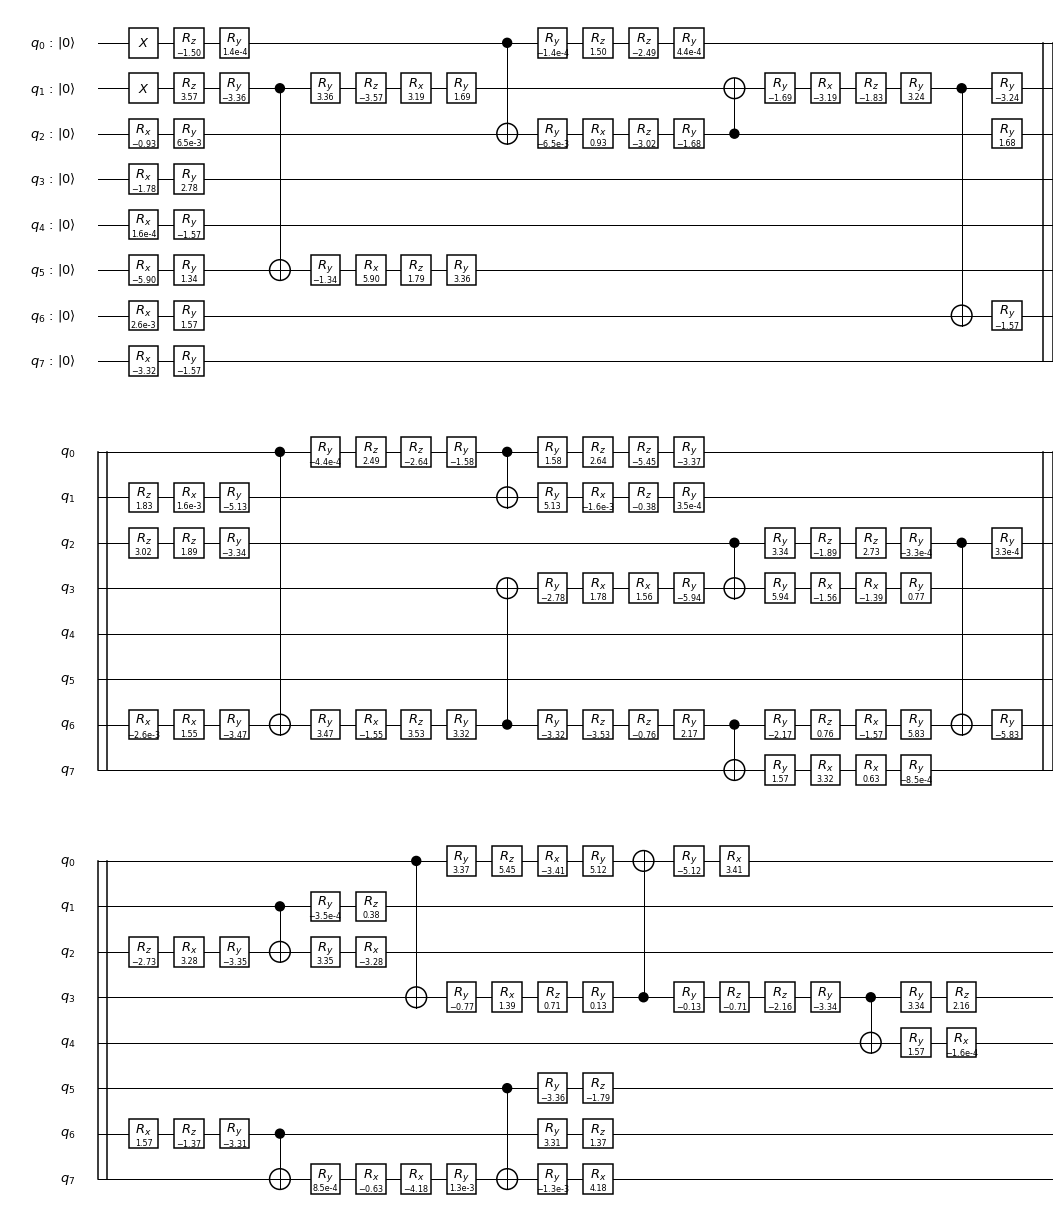

Iteration #126 is finished, 275840 circuit evaluations performed
  Values: -15.567626963806518, -15.567619449112872, -15.56759965580476, -15.565038232892212, -15.565031894462265, -15.565029723480292, -15.56316464114815, -15.563102282694693, -15.562811489322463, -15.560115234522215, -15.560095741292225, -15.560094569059785!
Iteration #127 is finished, 362592 circuit evaluations performed
  Values: -15.567610173236515, -15.567602179752448, -15.567595982159592, -15.56755356276094, -15.563099965034757, -15.563088726996735, -15.563078383731101, -15.563070006867777, -15.563060954163225, -15.563047027014688, -15.560093958981936, -15.560093584753954!
Iteration #128 is finished, 244736 circuit evaluations performed
  Values: -15.567637114264285, -15.567573548451875, -15.563116054622359, -15.563102811695613, -15.56310207537474, -15.563097165269086, -15.563097002051695, -15.563093606130264, -15.560111779394708, -15.56009551908497, -15.560094305968232, -15.560091244327017!
Iteration #129 is finish

Iteration #152 is finished, 387392 circuit evaluations performed
  Values: -15.56762742321173, -15.567491118140794, -15.565031931318414, -15.565026220299718, -15.564990394916894, -15.563098737515801, -15.563098425385089, -15.563095337384143, -15.563094082206645, -15.563067167271193, -15.562944745698216, -15.560091413351461!
Iteration #153 is finished, 455776 circuit evaluations performed
  Values: -15.56763309234571, -15.567618517160094, -15.567599289960366, -15.567558233885158, -15.567283069706791, -15.567227678830657, -15.56502826727054, -15.563095168555321, -15.560101707775084, -15.56009591289933, -15.560095227529867, -15.560092781708208!
Iteration #154 is finished, 294800 circuit evaluations performed
  Values: -15.567597614725965, -15.567591806190682, -15.566201863103384, -15.565034079343162, -15.565022652118325, -15.564963120653637, -15.563100652294073, -15.563092023050793, -15.56308682707153, -15.563072382701263, -15.560094989338968, -15.560089143285742!
Iteration #155 is finish

Iteration #178 is finished, 267312 circuit evaluations performed
  Values: -15.565032932924224, -15.565031578808247, -15.565029364733865, -15.56502674902966, -15.564905381284293, -15.563117639171411, -15.563106880634253, -15.563095080525823, -15.563085679149184, -15.563080437387777, -15.560099050944238, -15.56009174628069!
Iteration #179 is finished, 416048 circuit evaluations performed
  Values: -15.567647077015788, -15.567631680549216, -15.567614793743038, -15.56759796927397, -15.566691211805262, -15.56502783838656, -15.565018284044273, -15.565007219342846, -15.563045181267144, -15.56009670391348, -15.560094936174677, -15.560093109969527!
  New value: -15.567647077015788!


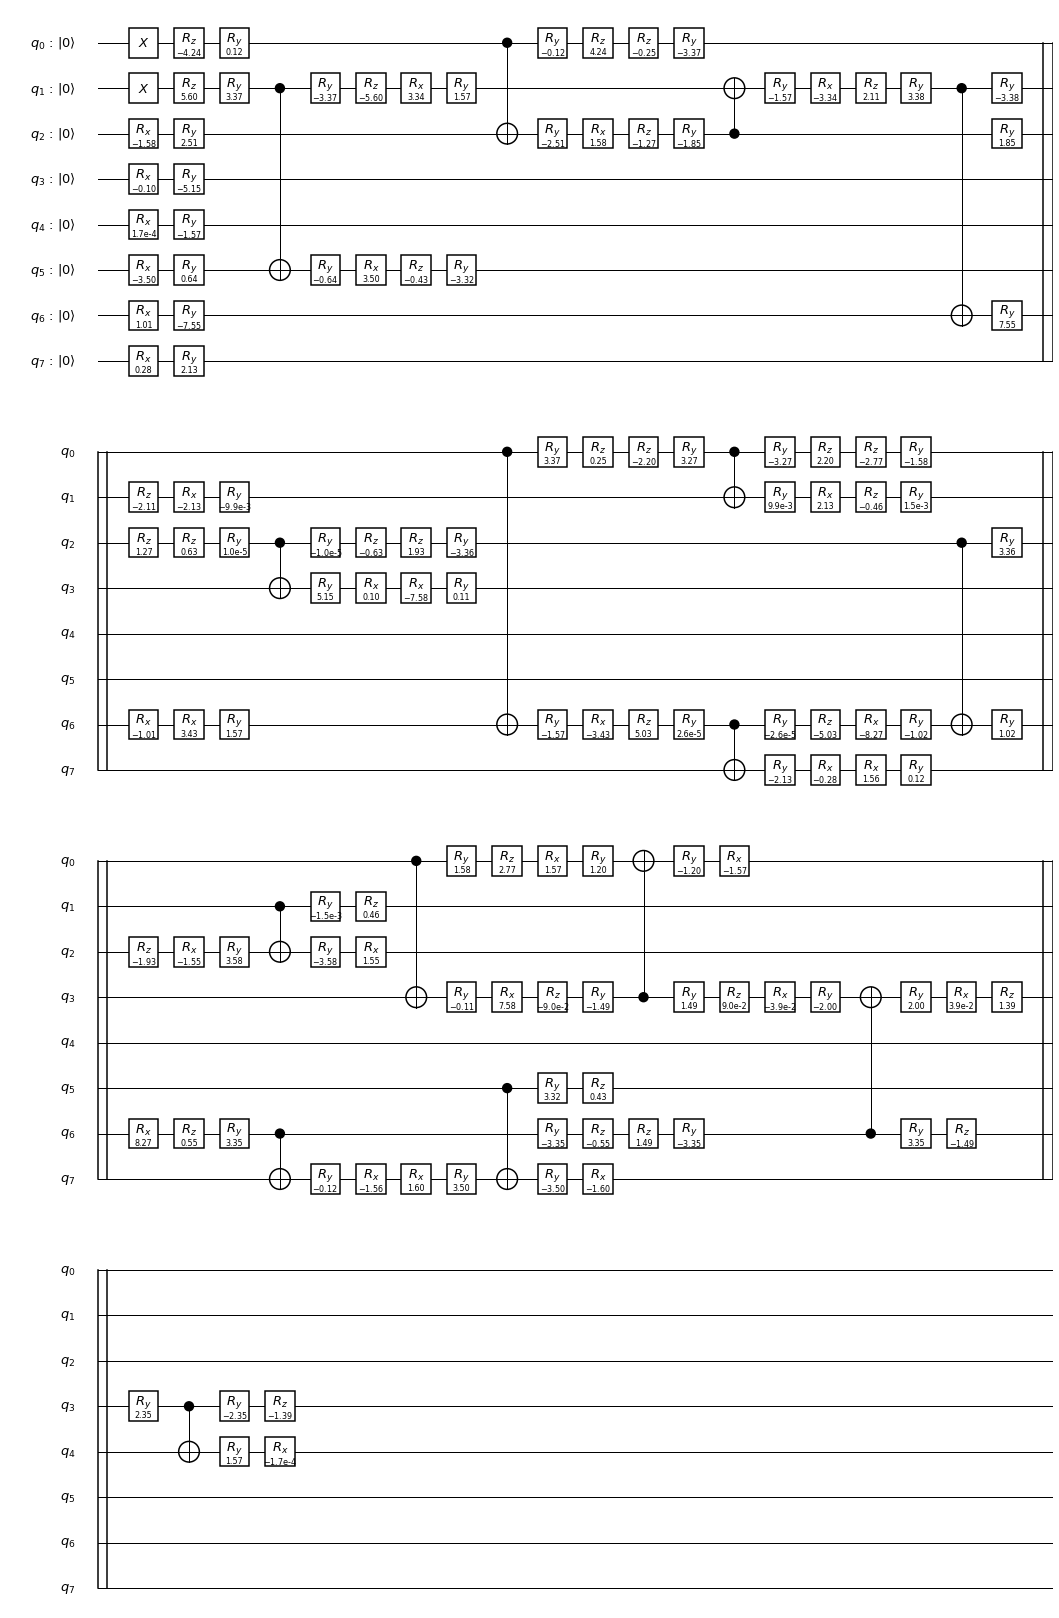

Iteration #180 is finished, 338432 circuit evaluations performed
  Values: -15.567640279181852, -15.567640186381038, -15.567636104490102, -15.567274306853745, -15.563109216594066, -15.563103212988882, -15.563099661268136, -15.563096473512347, -15.563089082550517, -15.563085189667403, -15.562704627144797, -15.562361726332254!
Iteration #181 is finished, 304480 circuit evaluations performed
  Values: -15.567640123010904, -15.567638405587516, -15.567523322716527, -15.56687208022362, -15.56503669731847, -15.565035114667197, -15.565030314515061, -15.564867827278322, -15.563106623301005, -15.563065897172047, -15.560095447272868, -15.560092977576785!
Iteration #182 is finished, 337072 circuit evaluations performed
  Values: -15.567598871841097, -15.563793575507967, -15.563111235566748, -15.56310560956513, -15.563105339706283, -15.563105164471773, -15.563102862838374, -15.563092754683778, -15.563089529279763, -15.563089192064714, -15.56306934874846, -15.560095930804394!
Iteration #183 is finis

Iteration #206 is finished, 326768 circuit evaluations performed
  Values: -15.567632324078017, -15.567598214355348, -15.567595851757083, -15.567558726779295, -15.565035830691881, -15.56310108414628, -15.563098409159487, -15.56309643151866, -15.562770589541572, -15.562616590808451, -15.562461348099701, -15.560091574567585!
Iteration #207 is finished, 250416 circuit evaluations performed
  Values: -15.567602670939625, -15.565032422202089, -15.564907548838983, -15.564881239349821, -15.563096588888104, -15.563091393984646, -15.563079563963216, -15.563078088027629, -15.563071540964403, -15.560107611752729, -15.560096150895156, -15.560093768798362!
Iteration #208 is finished, 341040 circuit evaluations performed
  Values: -15.567632807175585, -15.567597062573135, -15.567565195713888, -15.56311176710035, -15.563096178652524, -15.563082453136415, -15.563071706383989, -15.560128513761404, -15.56009636616092, -15.560094487812325, -15.560092578328902, -15.560091868323722!
Iteration #209 is finis

Iteration #232 is finished, 286320 circuit evaluations performed
  Values: -15.567594573038729, -15.567237375236857, -15.565030813346114, -15.56502107585144, -15.564984450680948, -15.563992556682356, -15.563097392727716, -15.563066480240655, -15.560098231280076, -15.560094910456602, -15.560094014600196, -15.56009278872306!
Iteration #233 is finished, 354272 circuit evaluations performed
  Values: -15.567639879288059, -15.567593483502833, -15.565615207480384, -15.564213075794203, -15.56308962494717, -15.563088035653577, -15.56307537814916, -15.56012957498819, -15.560101631195844, -15.560091159198718, -15.56008973929769, -15.560089461730332!
Iteration #234 is finished, 299264 circuit evaluations performed
  Values: -15.567622706428255, -15.567553819670994, -15.563148145172752, -15.563104720555387, -15.563104352339838, -15.563098729260973, -15.563093953030233, -15.563089853713196, -15.563079365412815, -15.56307832994677, -15.56298790663429, -15.56009230509947!
Iteration #235 is finished, 

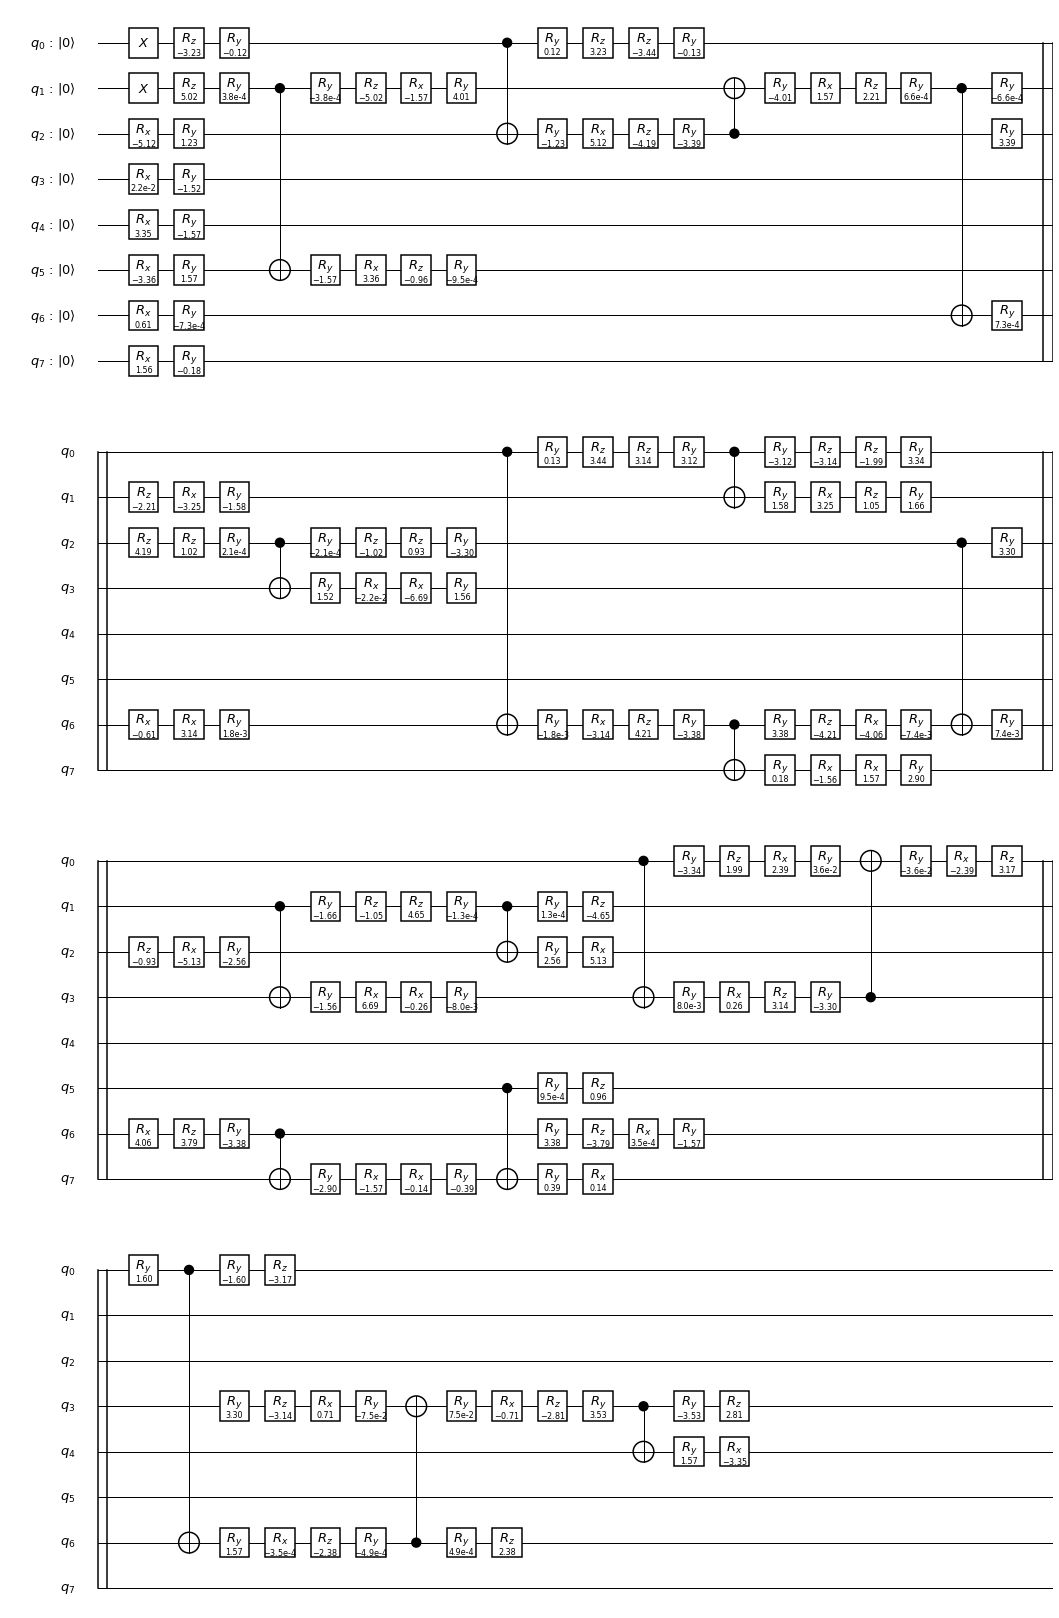

Iteration #240 is finished, 407808 circuit evaluations performed
  Values: -15.567623365484474, -15.567616084634357, -15.567583937397867, -15.5652893753817, -15.56502544898688, -15.56482604363393, -15.563107403300018, -15.56310664180432, -15.56310107283995, -15.56309882686502, -15.56128388335323, -15.560095433052144!
Iteration #241 is finished, 385200 circuit evaluations performed
  Values: -15.567635888265745, -15.567626909591958, -15.5676050308255, -15.567367245776742, -15.56311071445711, -15.563101142704472, -15.563100000742764, -15.563099405201706, -15.563092588794524, -15.563089717123265, -15.563072099005932, -15.561904131939809!
Iteration #242 is finished, 356704 circuit evaluations performed
  Values: -15.567628778969828, -15.567623333522175, -15.56527721706949, -15.56311551480755, -15.563115123089581, -15.56311257727905, -15.563109686624317, -15.563103091597293, -15.563096627250449, -15.563086246681998, -15.563042143401423, -15.56010869705223!
Iteration #243 is finished, 406064

In [ ]:
task = hamiltonians.q8
reports = [run(task, GateTypes.block_a, verbose=True) for i in range(0, 1)]

In [ ]:
task = hamiltonians.q4
for i in range(1, 5):
    report = run(task, GateTypes.block_b)
    rio.store('q4-block-b', 'i-{}'.format(i), report)

In [ ]:
task = hamiltonians.q4
for i in range(1, 50):
    report = run(task, GateTypes.block_cnot)
    rio.store('q4-block-cnot', 'i-{}'.format(i), report)

In [ ]:
r = rio.load('q4-block-a-iter-300', 'i-1')

In [ ]:
r = rio.load('q4-block-a-iter-300', 'i-8')
for i in r.iterations:
    for m in i.mutations:
        print(m.optimizer_data)

In [44]:
rio.store('collections', 'LiH-4', reports)